# generate feature list
```
python3 gen_feat.py --inf_list toy_imgs/img.list --feat_list toy_imgs/feat.list --resume magface_epoch_00025.pth
```

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="white") 
%matplotlib inline

# Visualize magnitudes (qualities)

In [2]:
def imshow(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
def show(idx_):
    imgname = imgnames[idx_]
    img = cv2.imread(imgname)
    imshow(img)
    print(img_2_mag[imgname], imgname)    

In [3]:
with open('toy_imgs/feat.list', 'r') as f:
    lines = f.readlines()

In [4]:
img_2_feats = {}
img_2_mag = {}
for line in lines:
    parts = line.strip().split(' ')
    imgname = parts[0]
    feats = [float(e) for e in parts[1:]]
    mag = np.linalg.norm(feats)
    img_2_feats[imgname] = feats/mag
    img_2_mag[imgname] = mag

In [5]:
imgnames = list(img_2_mag.keys())
mags = [img_2_mag[imgname] for imgname in imgnames]
sort_idx = np.argsort(mags)

In [6]:
H, W = 112, 112
NH, NW = 1, 10
canvas = np.zeros((NH * H, NW * W, 3), np.uint8)

for i, ele in enumerate(sort_idx):
    imgname = '/'.join(imgnames[ele].split('/')[-2:])
    img = cv2.imread(imgname)
    canvas[int(i / NW) * H: (int(i / NW) + 1) * H, (i % NW) * W: ((i % NW) + 1) * W, :] = img    

[21.78, 22.16, 24.09, 24.4, 25.9, 27.11, 27.41, 28.22, 28.73, 30.25]


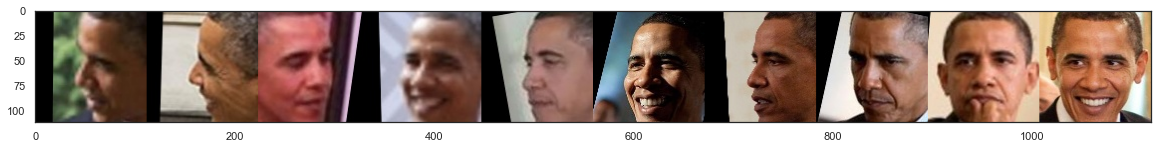

In [7]:
plt.figure(figsize=(20, 20))
print([float('{0:.2f}'.format(mags[idx_])) for idx_ in sort_idx])
imshow(canvas)

# visualize recognition

In [8]:
feats = np.array([img_2_feats[imgnames[ele]] for ele in sort_idx])
sim_mat = np.dot(feats, feats.T)

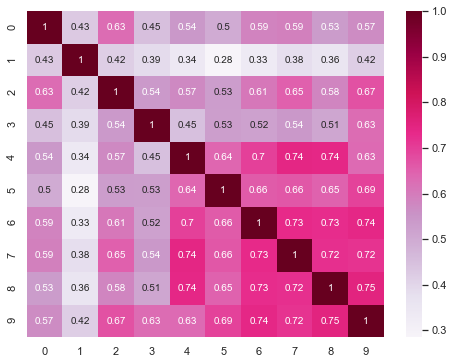

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))  
ax = sns.heatmap(sim_mat, cmap="PuRd", annot=True)